## Model the Brazilian tweet dataset using semantic similarity
code references: \
https://huggingface.co/tasks/sentence-similarity \
https://www.sbert.net/ \
https://towardsdatascience.com/semantic-textual-similarity-83b3ca4a840e

In [1]:
import pandas as pd
import numpy as np

In [8]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import util

In [35]:
from time import time
import matplotlib.pyplot as plt

### use sentance transformers

In [3]:
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173459e-02 -4.28515263e-02 -1.56286247e-02  1.40537536e-02
  3.95537727e-02  1.21796325e-01  2.94333640e-02 -3.17523852e-02
  3.54959480e-02 -7.93139860e-02  1.75878443e-02 -4.04369384e-02
  4.97259498e-02  2.54912544e-02 -7.18700439e-02  8.14968571e-02
  1.47069583e-03  4.79627103e-02 -4.50336039e-02 -9.92175341e-02
 -2.81769466e-02  6.45046085e-02  4.44670431e-02 -4.76216935e-02
 -3.52952629e-02  4.38671745e-02 -5.28565943e-02  4.33011563e-04
  1.01921491e-01  1.64072290e-02  3.26996557e-02 -3.45986746e-02
  1.21339597e-02  7.94871002e-02  4.58340580e-03  1.57778189e-02
 -9.68208816e-03  2.87625697e-02 -5.05805984e-02 -1.55793950e-02
 -2.87906844e-02 -9.62282252e-03  3.15556303e-02  2.27348972e-02
  8.71449485e-02 -3.85027491e-02 -8.84718448e-02 -8.75498727e-03
 -2.12343019e-02  2.08923742e-02 -9.02077705e-02 -5.25732450e-02
 -1.05638448e-02  2.88311020e-02 -1.61455069e-02  6.17842888e-03
 -1.23234

In [9]:
# to compare two embeddings, use cosine similarity
similarity = util.pytorch_cos_sim(embeddings[0, :], embeddings[1, :])
similarity

tensor([[0.5381]])

#### English examples

In [29]:
# now try to put it all together

#original_topic = 'personal protective equipment shortage'
original_topic = 'mask shortage'
#original_topic = 'protective shortage'

sentences = [
    'There is a dire need of masks in the province of Alberta.',             # shortage of PPE
    'We may need more batteries for the machines to run smoothly.',          # shortage of unrelated items
    'The masks in this department are all up to the quality standards',      # not shortage but mentioned PPE
    'Go down the path and turn left, and you will see the ice cream store.', # unrelated topic
]

#Sentences are encoded by calling model.encode()
embedding_origin = model.encode(original_topic)
embeddings = model.encode(sentences)

# to compare two embeddings, use cosine similarity
#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    similarity = util.pytorch_cos_sim(embedding_origin, embedding)
    
    print("Sentence:", sentence)
    print("similarity score:", similarity)
    print("")

Sentence: There is a dire need of masks in the province of Alberta.
similarity score: tensor([[0.6094]])

Sentence: We may need more batteries for the machines to run smoothly.
similarity score: tensor([[0.1267]])

Sentence: The masks in this department are all up to the quality standards
similarity score: tensor([[0.5937]])

Sentence: Go down the path and turn left, and you will see the ice cream store.
similarity score: tensor([[0.1063]])



#### Portuguese examples

In [30]:
# now try to put it all together in portugeuse
# thanks google translate!

#original_topic = 'personal protective equipment shortage'
original_topic = 'escassez de máscara'
#original_topic = 'protective shortage'

sentences = [
    'Há uma necessidade extrema de máscaras na província de Alberta.',             # shortage of PPE
    'Podemos precisar de mais baterias para que as máquinas funcionem sem problemas.',          # shortage of unrelated items
    'As máscaras neste departamento estão todas de acordo com os padrões de qualidade.',      # not shortage but mentioned PPE
    'Desça o caminho e vire à esquerda, e você verá a sorveteria.', # unrelated topic
]

#Sentences are encoded by calling model.encode()
embedding_origin = model.encode(original_topic)
embeddings = model.encode(sentences)

# to compare two embeddings, use cosine similarity
#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    similarity = util.pytorch_cos_sim(embedding_origin, embedding)
    
    print("Sentence:", sentence)
    print("similarity score:", similarity)
    print("")

Sentence: Há uma necessidade extrema de máscaras na província de Alberta.
similarity score: tensor([[0.5586]])

Sentence: Podemos precisar de mais baterias para que as máquinas funcionem sem problemas.
similarity score: tensor([[0.2033]])

Sentence: As máscaras neste departamento estão todas de acordo com os padrões de qualidade.
similarity score: tensor([[0.5992]])

Sentence: Desça o caminho e vire à esquerda, e você verá a sorveteria.
similarity score: tensor([[0.3603]])



### try applying our real dataset

In [31]:
file_name = 'brazil_df.csv'
df = pd.read_csv(file_name)

C:\Users\Kevvol\AppData\Local\Temp\ipykernel_5000\490307354.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [32]:
# extract only portuguese language entries
df_pt = df.loc[df['lang'] == 'pt']
print(len(df_pt))

2127643


In [33]:
import re

def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    return tweet

In [34]:
df_pt['text'] = df_pt['text'].apply(remove_usernames_links)

C:\Users\Kevvol\AppData\Local\Temp\ipykernel_5000\39966674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pt['text'] = df_pt['text'].apply(remove_usernames_links)


In [64]:
df_pt

,tweet_id,date_time,lang,user_id,retweeted_id,quoted_id,in_reply_to_id,sentiment_conf,sentiment_label,user_type,...,user_profile_description_country_code,user_profile_description_state,user_profile_description_county,user_profile_description_city,tweet_text_toponyms,tweet_text_country_code,tweet_text_state,tweet_text_county,tweet_text_city,text
0,1333561484631273473,2020-12-01 00:00:08,pt,1.256964e+18,NaN,NaN,NaN,0.765,0.0,UNK,...,['BR'],['UNK'],['UNK'],['UNK'],['Brasil'],['BR'],['UNK'],['UNK'],['UNK'],Dados atualizados no dia 01/12/2020 às 00:00 s...
1,1333561534233001988,2020-12-01 00:00:20,pt,1.254859e+18,NaN,NaN,NaN,0.597,0.0,PER,...,NaN,NaN,NaN,NaN,['Brasil'],['BR'],['UNK'],['UNK'],['UNK'],"São registrados, no total, 173.165 mortes e 6...."
2,1333561535835332608,2020-12-01 00:00:21,pt,1.247532e+18,NaN,NaN,NaN,0.885,0.0,ORG,...,['BR'],['UNK'],['UNK'],['UNK'],['Brasil'],['BR'],['UNK'],['UNK'],['UNK'],Atualização dos dados do Brasil. #coronavirus ...
3,1333561544286867457,2020-12-01 00:00:23,pt,9.605948e+17,1.333516e+18,NaN,NaN,0.784,-1.0,CARDINAL,...,['PE'],['Arequipa'],['UNK'],['Majes'],['Brasil'],['BR'],['UNK'],['UNK'],['UNK'],A OMS pediu nesta segunda-feira ao Brasil que ...
4,1333561579485470721,2020-12-01 00:00:31,pt,9.605948e+17,1.333495e+18,NaN,NaN,0.787,-1.0,CARDINAL,...,['PE'],['Arequipa'],['UNK'],['Majes'],['Brasil'],['BR'],['UNK'],['UNK'],['UNK'],Chefe da OMS diz que estado atual da epidemia ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233796,1377410322256916480,2021-03-31 23:59:46,pt,8.272665e+17,1.377387e+18,NaN,NaN,0.872,-1.0,PER,...,NaN,NaN,NaN,NaN,"['Covid', 'Brasil']","['IT', 'BR']","['Piemont', 'UNK']","['Cuneo', 'UNK']","['UNK', 'UNK']","3.869 óbitos nas últimas 24h, um novo recorde...."
2233797,1377410325423685636,2021-03-31 23:59:47,pt,3.392868e+08,1.377313e+18,NaN,NaN,0.882,-1.0,UNK,...,NaN,NaN,NaN,NaN,['Bolsonaro'],['BR'],['São Paulo'],['UNK'],['UNK'],"A ex-BBB e campeã de A Fazenda Flávia Viana, q..."
2233798,1377410332369461253,2021-03-31 23:59:48,pt,4.718284e+07,1.377086e+18,NaN,NaN,0.648,0.0,PER,...,NaN,NaN,NaN,NaN,"['VDEO', 'Bolsonaro']","['TG', 'BR']","['Plateaux Region', 'São Paulo']","['UNK', 'UNK']","['UNK', 'UNK']",VÍDEO: Com recorde de 3.780 mortes por covid e...
2233799,1377410332797231104,2021-03-31 23:59:49,pt,8.634409e+17,1.377396e+18,NaN,NaN,0.712,-1.0,UNK,...,NaN,NaN,NaN,NaN,['Brasil'],['BR'],['UNK'],['UNK'],['UNK'],Brasil fecha o mês mais letal da pandemia com ...


In [127]:
df_pt.columns

Index(['tweet_id', 'date_time', 'lang', 'user_id', 'retweeted_id', 'quoted_id',
       'in_reply_to_id', 'sentiment_conf', 'sentiment_label', 'user_type',
       'gender_label', 'tweet_text_named_entities', 'geo_coordinates_lat_lon',
       'geo_country_code', 'geo_state', 'geo_county', 'geo_city',
       'place_bounding_box', 'place_country_code', 'place_state',
       'place_county', 'place_city', 'user_loc_toponyms',
       'user_loc_country_code', 'user_loc_state', 'user_loc_county',
       'user_loc_city', 'user_profile_description_toponyms',
       'user_profile_description_country_code',
       'user_profile_description_state', 'user_profile_description_county',
       'user_profile_description_city', 'tweet_text_toponyms',
       'tweet_text_country_code', 'tweet_text_state', 'tweet_text_county',
       'tweet_text_city', 'text'],
      dtype='object')

In [134]:
df_pt['place_city'].loc[df_pt['place_city'] != float('NaN')].value_counts()

Belo Horizonte     5723
Porto Alegre       5641
Recife             3458
Fortaleza          3325
Manaus             3126
                   ... 
Ciudad del Este       1
Malmo                 1
Münster               1
Taguatinga            1
New York              1
Name: place_city, Length: 353, dtype: int64

#### inquiry estimation on how long vectorizing the whole set takes

In [55]:
# use the df.to_numpy() function
tes = df_pt[:2000]["text"].to_numpy()

In [56]:
n_samples = len(df_pt)
n_test = len(tes)

In [57]:
t0 = time()
test_embeddings = model.encode(tes)
td = time() - t0
print("done in %0.3fs." % (td))

done in 40.975s.


In [58]:
time_all = td/n_test*n_samples
print('estimated time to finish: ', time_all, 's')
print('in hours: ', time_all / 3600, 'h')

estimated time to finish:  43589.67903081012 s
in hours:  12.108244175225034 h


In [61]:
test_embeddings.shape

(2000, 384)

In [114]:
print('file size will be: ', 384 * n_samples * 8 / 1048576, 'MB')

file size will be:  6233.3291015625 MB


#### poking around

In [74]:
sample_date = df_pt.loc[10]['date_time']
print(sample_date)

print(sample_date >= '2020-12-01' and sample_date < '2020-12-15')

2020-12-01 00:01:12
True


In [110]:
df_2021_jan = df_pt.loc[(df_pt['date_time'] >= '2021-01-01') & (df_pt['date_time'] < '2021-02-01')]

In [111]:
len(df_2021_jan)

535398

In [84]:
(df_pt['date_time'] >= '2021-01-01') & (df_pt['date_time'] < '2021-02-01')

0          False
1          False
2          False
3          False
4          False
           ...  
2233796    False
2233797    False
2233798    False
2233799    False
2233800    False
Name: date_time, Length: 2127643, dtype: bool

In [97]:
df_pt['tweet_text_state'].apply(lambda x: type(x) == list and 'São Paulo' in x)

0          False
1          False
2          False
3          False
4          False
           ...  
2233796    False
2233797    False
2233798    False
2233799    False
2233800    False
Name: tweet_text_state, Length: 2127643, dtype: bool

In [104]:
'UNK' in df_pt['tweet_text_state'].loc[0]

True

In [106]:
df_pt['tweet_text_state'].apply(lambda x: type(x)).drop_duplicates()

0       <class 'str'>
14    <class 'float'>
Name: tweet_text_state, dtype: object

In [107]:
df_pt.loc[df_pt['tweet_text_state'].apply(lambda x: type(x) == float)]

,tweet_id,date_time,lang,user_id,retweeted_id,quoted_id,in_reply_to_id,sentiment_conf,sentiment_label,user_type,...,user_profile_description_country_code,user_profile_description_state,user_profile_description_county,user_profile_description_city,tweet_text_toponyms,tweet_text_country_code,tweet_text_state,tweet_text_county,tweet_text_city,text
14,1333561843009400832,2020-12-01 00:01:34,pt,6.005160e+08,NaN,NaN,NaN,0.588,-1.0,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O protocolo de segurança da #CBFC funciona tan...
16,1333561854094938112,2020-12-01 00:01:37,pt,9.152612e+17,NaN,NaN,NaN,0.914,-1.0,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nem festa de ano novo vai ter...nmrl corona vsf
24,1333562093824585730,2020-12-01 00:02:34,pt,7.906668e+07,NaN,1.333562e+18,NaN,0.813,-1.0,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A eleição atrapalhava as medidas 😉
28,1333562263173812236,2020-12-01 00:03:14,pt,3.703017e+09,NaN,NaN,NaN,0.401,0.0,ORG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Para os curiosos, não! Não é teste de gravidez..."
40,1333562710013992961,2020-12-01 00:05:01,pt,1.754666e+08,NaN,NaN,1.333563e+18,0.519,1.0,PER,...,['BR'],['Santa Catarina'],['UNK'],['Joinville'],NaN,NaN,NaN,NaN,NaN,Faz ventosa e ganha corona de brinde kkkkkkkk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233630,1377409133561847810,2021-03-31 23:55:03,pt,1.198005e+09,NaN,1.377409e+18,NaN,0.596,0.0,PER,...,"['PT', 'AR']","['North', 'Entre Ríos Province']","['Aveiro', 'Distrito Francisco Ramírez']","['UNK', 'UNK']",NaN,NaN,NaN,NaN,NaN,"Em números relativos, somos 2,7% da população ..."
2233659,1377409289053163522,2021-03-31 23:55:40,pt,6.741160e+07,NaN,NaN,NaN,0.435,0.0,ORG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Fiquei sabendo hoje que meu pneumologista, e u..."
2233690,1377409521761411076,2021-03-31 23:56:35,pt,8.929017e+17,NaN,NaN,1.377409e+18,0.739,0.0,UNK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nada, só disseram que ele ta com corona. Quer..."
2233709,1377409660966236162,2021-03-31 23:57:08,pt,1.250977e+18,NaN,NaN,1.377322e+18,0.866,0.0,UNK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nenhum. Só quando pegou covid19.


#### querying example

In [123]:
# select the tweets from São Paulo in January of 2021
df_saopaulo_2021_jan = df_pt.loc[
    df_pt['tweet_text_state'].apply(lambda x: type(x) == str and 'São Paulo' in x) &
    (df_pt['date_time'] >= '2021-01-01') & (df_pt['date_time'] < '2021-04-01')
]

In [124]:
len(df_saopaulo_2021_jan)

476975

#### load a multiligual model

In [115]:
model_multiligual = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

#### transform the sao paulo subset

In [116]:
# use the df.to_numpy() function
tes = df_saopaulo_2021_jan[:1000]["text"].to_numpy()

In [125]:
n_samples = len(df_saopaulo_2021_jan)
n_test = len(tes)

In [117]:


t0 = time()
test_embeddings = model_multiligual.encode(tes)
td = time() - t0
print("done in %0.3fs." % (td))

done in 32.685s.


In [126]:
time_all = td/n_test*n_samples
print('estimated time to finish: ', time_all, 's')
print('in hours: ', time_all / 3600, 'h')

estimated time to finish:  15589.769777321813 s
in hours:  4.330491604811614 h


In [122]:
p = model_multiligual.encode(['falta de leitos de UTI', 'icu bed shortage'])
util.pytorch_cos_sim(p[0, :], p[1, :])

tensor([[0.5128]])

#### run the entire subset

In [135]:
from tqdm import tqdm

In [137]:
n_batch = 10000
num_loop = n_samples // n_batch

output_dir = 'vectorized_saopaulo_2021Q1'

In [138]:
num_loop

47

In [140]:
df_saopaulo_2021_jan.to_csv(output_dir + '/' + 'df_saopaulo_2021_Q1.csv')

In [142]:
for i in tqdm(range(num_loop+1)):
    # use the df.to_numpy() function
    chunk = df_saopaulo_2021_jan[i*n_batch:min((i+1)*n_batch, n_samples)]
    chunk_text = chunk["text"].to_numpy()
    # vectorized
    vectorized = model_multiligual.encode(chunk_text)
    
    # store to file
    #chunk.to_csv(output_dir + '/' + 'datachunk_%02d.csv' % i)
    np.save((output_dir + '/' + ('data_vectorized_%02d.csv' % i)), vectorized)

100%|████████████████████████████████████████████████████████████████████████████| 47/47 [4:36:13<00:00, 352.62s/it]


#### check the created files

In [139]:
df_saopaulo_2021_jan

,tweet_id,date_time,lang,user_id,retweeted_id,quoted_id,in_reply_to_id,sentiment_conf,sentiment_label,user_type,...,user_profile_description_country_code,user_profile_description_state,user_profile_description_county,user_profile_description_city,tweet_text_toponyms,tweet_text_country_code,tweet_text_state,tweet_text_county,tweet_text_city,text
332944,1344795639989874688,2021-01-01 00:00:40,pt,1.282810e+18,1.344795e+18,NaN,NaN,0.690,1.0,PER,...,NaN,NaN,NaN,NaN,['Bolsonaro'],['BR'],['São Paulo'],['UNK'],['UNK'],"Feliz novo ano, amigues. Saúde, disposição pra..."
332949,1344795905447370758,2021-01-01 00:01:43,pt,2.997481e+08,1.344787e+18,NaN,NaN,0.557,-1.0,PER,...,NaN,NaN,NaN,NaN,"['Brasil', 'Bolsonaro']","['BR', 'BR']","['UNK', 'São Paulo']","['UNK', 'UNK']","['UNK', 'UNK']","O Brasil já registrou até agora, 194.976 morte..."
332953,1344795952331317256,2021-01-01 00:01:54,pt,1.202404e+18,1.344654e+18,NaN,NaN,0.598,0.0,UNK,...,NaN,NaN,NaN,NaN,['Bolsonaro'],['BR'],['São Paulo'],['UNK'],['UNK'],Eu tenho poucos desejos p 2021:\n🐊 Manter minh...
332957,1344796102789373952,2021-01-01 00:02:30,pt,2.932204e+09,1.344752e+18,NaN,NaN,0.615,-1.0,PER,...,NaN,NaN,NaN,NaN,"['Brasil', 'Bolsonaro']","['BR', 'BR']","['UNK', 'São Paulo']","['UNK', 'UNK']","['UNK', 'UNK']",O ano de 2020 e a pandemia da COVID deixaram u...
332963,1344796225862852610,2021-01-01 00:03:00,pt,4.990873e+08,NaN,NaN,NaN,0.920,1.0,PER,...,NaN,NaN,NaN,NaN,"['Jardim Paraiso', 'Botucatu']","['BR', 'BR']","['São Paulo', 'São Paulo']",['Região Metropolitana do Vale do Paraíba e Li...,"['Jacareí', 'Botucatu']","Esperando a chegada de 2021, com ela e muita ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233772,1377410174554624003,2021-03-31 23:59:11,pt,4.063193e+08,1.377403e+18,NaN,NaN,0.920,-1.0,PER,...,['BR'],['UNK'],['UNK'],['UNK'],['Bolsonaro'],['BR'],['São Paulo'],['UNK'],['UNK'],Depois de meses criticando o governo por falta...
2233773,1377410177574506496,2021-03-31 23:59:12,pt,1.101682e+08,1.377371e+18,NaN,NaN,0.922,-1.0,PER,...,NaN,NaN,NaN,NaN,['Bolsonaro'],['BR'],['São Paulo'],['UNK'],['UNK'],Bolsonaro é o produto da escrotocracia milicia...
2233789,1377410298781564931,2021-03-31 23:59:40,pt,1.158449e+18,1.377380e+18,NaN,NaN,0.799,0.0,PER,...,NaN,NaN,NaN,NaN,"['Butantan', 'Covid', 'Sorocaba']","['CO', 'IT', 'BR']","['Antioquia', 'Piemont', 'São Paulo']","['Sonsón', 'Cuneo', 'Região Metropolitana de S...","['UNK', 'UNK', 'Sorocaba']",Os cientistas do Butantan que coordenam uma re...
2233797,1377410325423685636,2021-03-31 23:59:47,pt,3.392868e+08,1.377313e+18,NaN,NaN,0.882,-1.0,UNK,...,NaN,NaN,NaN,NaN,['Bolsonaro'],['BR'],['São Paulo'],['UNK'],['UNK'],"A ex-BBB e campeã de A Fazenda Flávia Viana, q..."


In [168]:
c_00 = np.load(output_dir + '/' + ('data_vectorized_00.csv.npy'))
c_06 = np.load(output_dir + '/' + ('data_vectorized_06.csv.npy'))
c_46 = np.load(output_dir + '/' + ('data_vectorized_46.csv.npy'))

In [169]:
np.sum(c_00 == c_06)

0

In [170]:
c_00.shape

(10000, 384)

#### load the generated files back into a np array

In [166]:
data_vectors = []

In [173]:
for i in tqdm(range(num_loop+1)):
    # read it from stored file
    cur_chunk = np.load(output_dir + '/' + ('data_vectorized_%02d.csv.npy' % i))
    data_vectors.append(cur_chunk)

100%|██████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 178.87it/s]


In [174]:
saopaulo_q1_vectorized = np.concatenate(data_vectors)

In [176]:
saopaulo_q1_vectorized.shape

(476975, 384)

#### similarity mapping

In [177]:
# define an origin point on the vector space
topic_origin = model_multiligual.encode('ICU beds shortage')

In [178]:
topic_similarities = util.pytorch_cos_sim(topic_origin, saopaulo_q1_vectorized)

In [188]:
type(topic_similarities)

torch.Tensor

In [190]:
np.sum(topic_similarities.numpy() >= 0.2)

137551

In [200]:
(topic_similarities[0] >= 0.2).numpy()

array([False, False, False, ..., False, False, False])

#### now work with df_saopaulo_2021_jan and filter out tweets

In [202]:
topic_relevancy_filtered = df_saopaulo_2021_jan.loc[(topic_similarities[0] >= 0.2).numpy()]

In [203]:
topic_relevancy_filtered

,tweet_id,date_time,lang,user_id,retweeted_id,quoted_id,in_reply_to_id,sentiment_conf,sentiment_label,user_type,...,user_profile_description_country_code,user_profile_description_state,user_profile_description_county,user_profile_description_city,tweet_text_toponyms,tweet_text_country_code,tweet_text_state,tweet_text_county,tweet_text_city,text
332999,1344797202913357826,2021-01-01 00:06:52,pt,2.540066e+07,1.344712e+18,NaN,NaN,0.733,-1.0,PER,...,NaN,NaN,NaN,NaN,"['COVID', 'Sinal']","['IT', 'BR']","['Piemont', 'São Paulo']","['Cuneo', 'Região Metropolitana de São Paulo']","['UNK', 'São Paulo']","Em 2019, tivemos menos de 10 mil mortes por sí..."
333001,1344797278050136065,2021-01-01 00:07:10,pt,5.405797e+07,1.344712e+18,NaN,NaN,0.733,-1.0,ORG,...,NaN,NaN,NaN,NaN,"['COVID', 'Sinal']","['IT', 'BR']","['Piemont', 'São Paulo']","['Cuneo', 'Região Metropolitana de São Paulo']","['UNK', 'São Paulo']","Em 2019, tivemos menos de 10 mil mortes por sí..."
333009,1344797518165651457,2021-01-01 00:08:08,pt,8.664266e+17,1.344712e+18,NaN,NaN,0.733,-1.0,PER,...,NaN,NaN,NaN,NaN,"['COVID', 'Sinal']","['IT', 'BR']","['Piemont', 'São Paulo']","['Cuneo', 'Região Metropolitana de São Paulo']","['UNK', 'São Paulo']","Em 2019, tivemos menos de 10 mil mortes por sí..."
333067,1344799371934781440,2021-01-01 00:15:30,pt,3.866143e+07,1.344712e+18,NaN,NaN,0.733,-1.0,PER,...,NaN,NaN,NaN,NaN,"['COVID', 'Sinal']","['IT', 'BR']","['Piemont', 'São Paulo']","['Cuneo', 'Região Metropolitana de São Paulo']","['UNK', 'São Paulo']","Em 2019, tivemos menos de 10 mil mortes por sí..."
333071,1344799496581087232,2021-01-01 00:15:59,pt,7.055609e+17,NaN,NaN,NaN,0.918,-1.0,PER,...,NaN,NaN,NaN,NaN,"['Bolsonaro', 'Covid']","['BR', 'IT']","['São Paulo', 'Piemont']","['UNK', 'Cuneo']","['UNK', 'UNK']","Bolsonaro fala tanto sobre ""precaução"" e ""caut..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233675,1377409431646789633,2021-03-31 23:56:14,pt,1.321576e+18,1.377408e+18,NaN,NaN,0.494,0.0,PER,...,['BR'],['UNK'],['UNK'],['UNK'],"['Bolsonaro', 'Covid', 'Governo']","['BR', 'IT', 'IT']","['São Paulo', 'Piemont', 'Piemont']","['UNK', 'Cuneo', 'Cuneo']","['UNK', 'UNK', 'UNK']","*Bolsonaro: ""valor do auxílio emergencial é 'p..."
2233691,1377409534893850627,2021-03-31 23:56:38,pt,8.939552e+17,1.377286e+18,NaN,NaN,0.856,-1.0,ORG,...,NaN,NaN,NaN,NaN,['Bolsonaro'],['BR'],['São Paulo'],['UNK'],['UNK'],Bolsonaro diz: se pegar COVID procure um médic...
2233744,1377409891829129216,2021-03-31 23:58:03,pt,2.411760e+08,1.377318e+18,NaN,NaN,0.873,-1.0,PER,...,NaN,NaN,NaN,NaN,"['Araraquara', 'CEFORSUS SP', 'Secretaria']","['BR', 'BR', 'BR']","['São Paulo', 'São Paulo', 'Pará']","['UNK', 'UNK', 'UNK']","['Araraquara', 'Araraquara', 'Santarém']",O Prefeito petista de Araraquara impôs lockdow...
2233759,1377410045672050691,2021-03-31 23:58:40,pt,2.340247e+09,1.377318e+18,NaN,NaN,0.873,-1.0,PER,...,['BR'],['Pernambuco'],['UNK'],['UNK'],"['Araraquara', 'CEFORSUS SP', 'Secretaria']","['BR', 'BR', 'BR']","['São Paulo', 'São Paulo', 'Pará']","['UNK', 'UNK', 'UNK']","['Araraquara', 'Araraquara', 'Santarém']",O Prefeito petista de Araraquara impôs lockdow...


In [206]:
by_date = topic_relevancy_filtered['date_time'].apply(lambda row: row[:10])

In [209]:
# get time series of amount of tweet with sufficiently close topic vector per day
by_date.value_counts(sort=False)

2021-01-01     296
2021-01-02     326
2021-01-03     426
2021-01-04     590
2021-01-05     512
              ... 
2021-03-27    3613
2021-03-28    2261
2021-03-29    1647
2021-03-30     846
2021-03-31    1461
Name: date_time, Length: 90, dtype: int64

In [214]:
topic_tweet_per_day = by_date.value_counts(sort=False).to_numpy()

#### time series of bed usage dataset

In [222]:
# get the bed time series
df_bed_usage = pd.read_csv('brazil_beds.csv')

df_bed_usage_sp = df_bed_usage.loc[(df_bed_usage['location_name'] == 'São Paulo') & df_bed_usage['date'].apply(lambda x: x[-4:] == '2021')]

In [223]:
df_bed_usage_sp

,location_id,date,version_name,location_name,hospital_beds_mean,icu_beds_mean,all_bed_capacity,icu_bed_capacity,prop_hospital_beds,prop_icu_beds
862,4775,01-01-2021,reference,São Paulo,7594.54,4757.16,84259,7859,0.090133,0.605314
889,4775,02-01-2021,reference,São Paulo,7619.41,4713.84,84259,7859,0.090428,0.599802
916,4775,03-01-2021,reference,São Paulo,7663.97,4694.94,84259,7859,0.090957,0.597397
943,4775,04-01-2021,reference,São Paulo,7792.74,4724.74,84259,7859,0.092486,0.601188
970,4775,05-01-2021,reference,São Paulo,8009.80,4817.56,84259,7859,0.095062,0.612999
...,...,...,...,...,...,...,...,...,...,...
3157,4775,27-03-2021,reference,São Paulo,21190.58,10794.57,84259,7859,0.251493,1.373530
3184,4775,28-03-2021,reference,São Paulo,20993.61,10752.33,84259,7859,0.249156,1.368155
3211,4775,29-03-2021,reference,São Paulo,20659.02,10625.04,84259,7859,0.245185,1.351958
3238,4775,30-03-2021,reference,São Paulo,20299.71,10529.04,84259,7859,0.240920,1.339743


In [224]:
df_bed_usage_sp_icu = df_bed_usage_sp['icu_beds_mean'].to_numpy()
df_bed_usage_sp_hospital = df_bed_usage_sp['hospital_beds_mean'].to_numpy()

In [213]:
import matplotlib.pyplot as plt

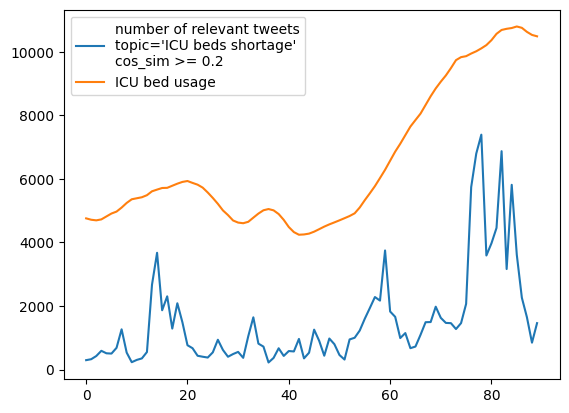

In [234]:
plt.plot(topic_tweet_per_day, label='number of relevant tweets\ntopic=\'ICU beds shortage\'\ncos_sim >= 0.2')
plt.plot(df_bed_usage_sp_icu, label='ICU bed usage')
#plt.plot(df_bed_usage_sp_hospital, label='regular bed usage')

plt.legend()
plt.show()

### run CCM causality modeling

In [235]:
from causal_ccm.causal_ccm import ccm

In [238]:
X = topic_tweet_per_day
Y = df_bed_usage_sp_icu

assert X.shape == Y.shape
assert np.count_nonzero(~np.isnan(X)) == np.count_nonzero(~np.isnan(Y))
assert np.count_nonzero(~np.isnan(X)) == X.shape[0]

In [239]:
# inputs
tau = 1 # time lag
E = 2 # shadow manifold embedding dimensions
L = len(X) # length of time period to consider

# if we wish to check if X causes Y
ccm1 = ccm(X, Y, tau, E, L)

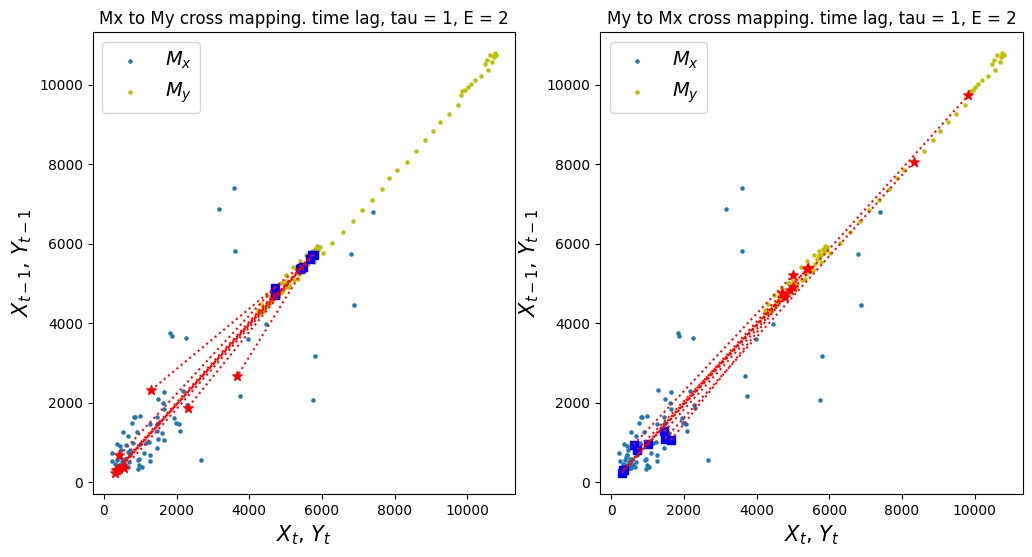

In [240]:
# visualize sample cross mapping
ccm1.visualize_cross_mapping()

In [241]:
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
corr_, p = ccm1.causality()
corr_, p

(0.7602426180203741, 5.61012157812474e-18)

#### all tweets

In [260]:
by_date_all = df_saopaulo_2021_jan['date_time'].apply(lambda row: row[:10])

# get time series of amount of tweet with sufficiently close topic vector per day
topic_tweet_per_day_all = by_date_all.value_counts(sort=False).to_numpy()

In [261]:
X = topic_tweet_per_day_all
Y = df_bed_usage_sp_icu

assert X.shape == Y.shape
assert np.count_nonzero(~np.isnan(X)) == np.count_nonzero(~np.isnan(Y))
assert np.count_nonzero(~np.isnan(X)) == X.shape[0]

In [262]:
# inputs
tau = 1 # time lag
E = 2 # shadow manifold embedding dimensions
L = len(X) # length of time period to consider

# if we wish to check if X causes Y
ccm2 = ccm(X, Y, tau, E, L)

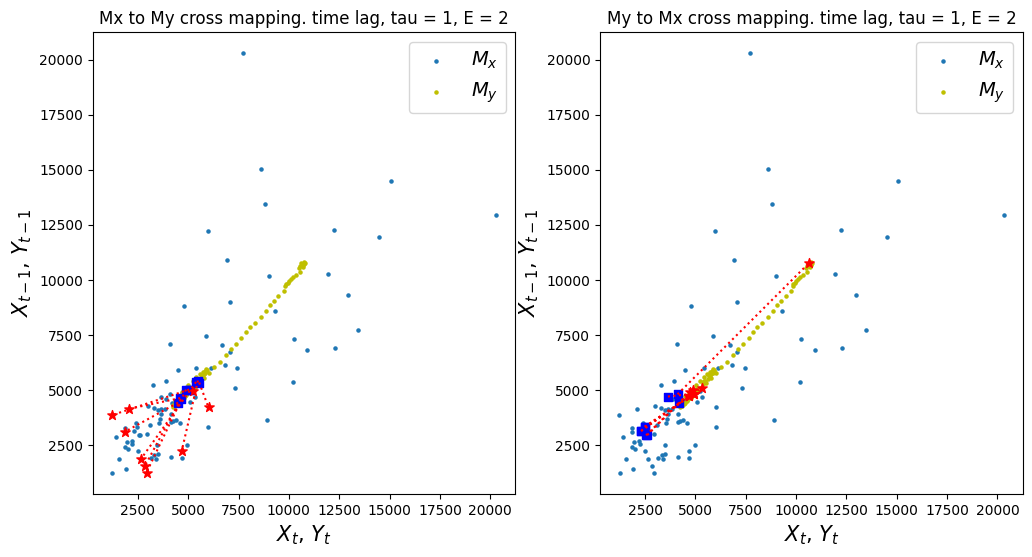

In [263]:
# visualize sample cross mapping
ccm2.visualize_cross_mapping()

In [264]:
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
corr_, p = ccm2.causality()
corr_, p

(0.7423780303156364, 8.392043733508928e-17)

X->Y r 0.73 p value 0.0
Y->X r 0.63 p value 0.0


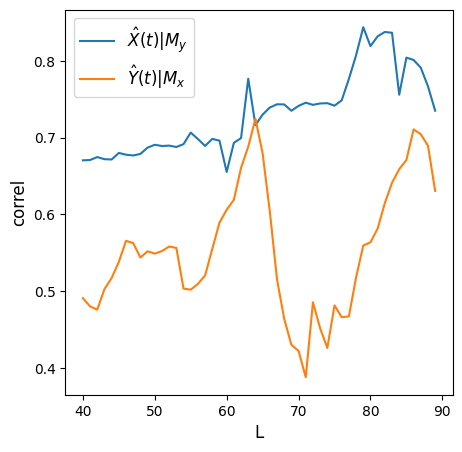

In [265]:
# checking convergence
# Looking at "convergence"
L_range = range(40, len(X), 1) # L values to test
tau = 1
E = 2

Xhat_My, Yhat_Mx = [], [] # correlation list
for L in L_range: 
    ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 4))
print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 4))    
    
# plot convergence as L->inf. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=12)
plt.ylabel('correl', size=12)
plt.legend(prop={'size': 12})

In [257]:
thresholds_list = [i * 0.05 for i in range(10)]

In [259]:
ccm_models = []
stats = []

for threshold in thresholds_list:
    # filter by topic
    topic_relevancy_filtered_by_t = df_saopaulo_2021_jan.loc[(topic_similarities[0] >= threshold).numpy()]
    # then group count by date
    by_date = topic_relevancy_filtered_by_t['date_time'].apply(lambda row: row[:10])
    
    # get time series of amount of tweet with sufficiently close topic vector per day
    topic_tweet_per_day = by_date.value_counts(sort=False).to_numpy()
    
    X = topic_tweet_per_day
    Y = df_bed_usage_sp_icu
    
    if X.shape != Y.shape:
        continue
    
    # inputs
    tau = 1 # time lag
    E = 2 # shadow manifold embedding dimensions
    L = len(X) # length of time period to consider

    # if we wish to check if X causes Y
    ccm_cur = ccm(X, Y, tau, E, L)
    
    # causality X -> Y
    # returns: (correlation ("strength" of causality), p-value(significance))
    corr_, p = ccm_cur.causality()
    
    ccm_models.append(ccm_cur)
    stats.append((corr_, p))
    
    print("threshold: %0.2f" % threshold, "corr =", corr_, "p =", p)

threshold: 0.00 corr = 0.743295458304874 p = 7.343455610079989e-17
threshold: 0.05 corr = 0.7373633995112873 p = 1.7236263860658006e-16
threshold: 0.10 corr = 0.7389472867809612 p = 1.3755836858692525e-16
threshold: 0.15 corr = 0.7261900017599452 p = 8.091140877885333e-16
threshold: 0.20 corr = 0.7602426180203741 p = 5.61012157812474e-18
threshold: 0.25 corr = 0.7310350662800509 p = 4.1774032275888083e-16
threshold: 0.30 corr = 0.6352846267075541 p = 2.276862709492232e-11
threshold: 0.35 corr = 0.5115318930064545 p = 3.007808289805871e-07
threshold: 0.40 corr = 0.43682514384272364 p = 1.8705538100516783e-05
